In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn.cross_validation as cv
from sklearn import preprocessing, metrics 
from sklearn.neighbors import KNeighborsClassifier

import machineplot


In [40]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First of all we need to load and prepare the data. I won't go into all the details of this 
because its not the purpose of this post, but I will describe some of the techniques used to 
transform the data into the required format, in order to be 'pushed' through our ML algorithms.


So first we load the data and take a look at what we are dealing with.


In [58]:
df  =pd.read_csv('C://Users//P//TitanicTrain.csv', sep = ',')

print df.head()

print df.dtypes

print df.shape


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(891, 12

Using the isnull() function we can see the vast majority of the 'Cabin' feature are NaN's
and so we will drop this column entirely. We will also drop the 'Name' feature, as really, the only useful
information here is the gender of the passenger, which we already know from the 'Sex' feature.  


In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have a small number of NaN's for the 'Age' feature, we could deal with this in a number of ways, 
but for now we will set any NaN's to be the 'mean' age , which is around 30 yrs old. 
(By default Pandas will make a copy of the dataframe, so we use inplace = True, to overide this).


In [43]:
df['Age'].describe()

df['Age'].replace(NaN, 29, inplace = True)


'Ticket' has a mix of string and integer values, so we could remove the string elements,
which would allow us to use the 'Ticket' feature in our analysis. the following line of code would 
do this.


df['Ticket'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')


However we will just drop the column for this excercise (as it doesnt have much significant 
predictive power anyway).


Here we drop the aforementioned unwanted columns along with 'PassengerID' as we already have an index 
(and the two 'Embarked' NaN's).


In [45]:
df1 = df.drop(['Cabin','Name','Ticket','PassengerId'],1)
df1 = df1.dropna(0)


Next, as the Machine Learning algoritms that we will be using require numerical data
for all feature values, we need to convert the 'string' values into a numerical format. 


In [46]:
X = pd.get_dummies(df1)
X.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1


Now the data is in the format we want it, we can seperate our Features as X values
and the feature to be predicted ('Survived') as y.


In [47]:
y = X['Survived']
X1 = X.drop(['Survived'],1)


Our final Pandas DataFrames!


In [62]:
print X[:5]
print X.shape
print y.shape


[[ 0.82520863 -0.57964299  0.43135024 -0.47432585 -0.50023975 -0.73534203
   0.73534203 -0.48271079 -0.30794088  0.61679395]
 [-1.57221121  0.65458337  0.43135024 -0.47432585  0.78894661  1.35991138
  -1.35991138  2.07163382 -0.30794088 -1.62128697]
 [ 0.82520863 -0.2710864  -0.47519908 -0.47432585 -0.48664993  1.35991138
  -1.35991138 -0.48271079 -0.30794088  0.61679395]
 [-1.57221121  0.42316593  0.43135024 -0.47432585  0.42286111  1.35991138
  -1.35991138 -0.48271079 -0.30794088  0.61679395]
 [ 0.82520863  0.42316593 -0.47519908 -0.47432585 -0.4841333  -0.73534203
   0.73534203 -0.48271079 -0.30794088  0.61679395]]
(889, 10)
(889,)


We then convert our Pandas DataFrame to a NumPy array, this makes it easier to use the 
Scikit-Learn functions on our data.


In [49]:
X = np.array(X1)
y = np.array(y)


This is our final data set which we will use for analysis and prediction.


next we 'preprocess' the data so we have normalized values across all features
and check our input feature and classifiers have the same number of rows.


In [64]:
X = preprocessing.scale(X)
print X.shape
print y.shape


(889, 10)
(889,)


The final preperation of our data ready for running prediction on, is to split our data
into the 'seen' training data and the 'unseen' test/validation data.
we choose a 30 /70 split in this case.


In [63]:
Xtrain, Xtest, Ytrain, Ytest = cv.train_test_split(X,y,test_size = 0.3,
                                                   random_state = 1)
                                                   
print Xtrain.shape                                                   
print Ytrain.shape


(622, 10)
(622,)


We are now in a position to visualise the data, an important part of the Machine Learning process. For this we will use the preview() function from the machineplot.py package, to get a visual on how our different features compare.

The function takes the following parameters: 
data = final pandas dataframe
X = X
y = y
feature_num1 = our first feature to compare(eg 1 which is 'Age')
feature_num2 = second feature to view (eg  number 4 'Fare')


(Note: preview() is designed to view how features compare against each other 1 vs 1 for each of two predictors, in our case Survived or not (0 or 1). As we have many dummy variables in ths example, I have chossen the two numerical feature 'Age' and 'Fare' to demonstrate the functions' capabilities.)



Here we can see that more of the higher Fare paying passengers survived, also there seems to be a bias towards older passengers perishing vs younger.


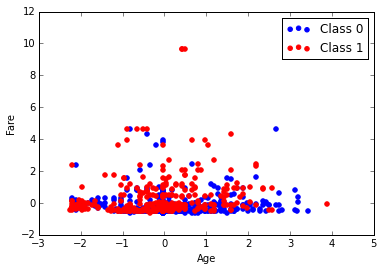

In [52]:
machineplot.MLPlot().preview_plot(X1,X,y,1,4)


We are now ready to run our classifier.
for this we will use Scikit-Learn's K Nearest Neighbour Classifier and we will start with a nominal 1 'n_neighbors' and the default 'uniform' weights parameter.
We first show the classifer our test data...


In [53]:
knn1= KNeighborsClassifier(n_neighbors = 1)
knn1.fit(Xtrain,Ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

Now we have our classifer built from the training set, we will attempt a prediction on the test/validation set.


In [54]:
k1pred = knn1.predict(Xtest)


Here is the output from this first attempt at a classifer.
A combined f1-score of 78 is not bad, but lets see if we can improve on this...


In [55]:
print metrics.classification_report(Ytest, k1pred)


             precision    recall  f1-score   support

          0       0.83      0.81      0.82       166
          1       0.70      0.73      0.72       101

avg / total       0.78      0.78      0.78       267



In our first attempt we used nominal parameters for our K Nearest Neighbor classifer. 
Now I will demonstrate how to use 'Grid Search' combined with grid_plot() from the 'machineplot' package to improve on this performance and visualise the results. 


The grid_knn() function searches for the optimal parameters for the K Nearest Neighbors classifier and shows this in the form of a visualisation.
It then returns the performance metrics of the new optimized classifier and returns its predictive performance on the cross validation Ytrain data.
As we can see, we have increased our performance from 78% up to 83% : 
a not insignificant improvement.

optimal n_neighbors: 7
optimal weight: uniform


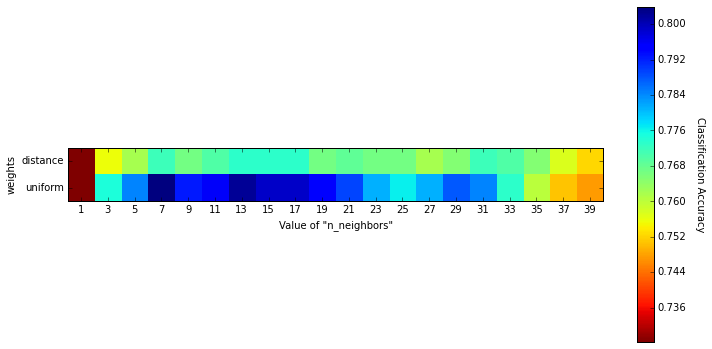

this is performance of optimal classifier on Ytest              precision    recall  f1-score   support

          0       0.85      0.88      0.87       166
          1       0.79      0.75      0.77       101

avg / total       0.83      0.83      0.83       267



In [56]:
machineplot.MLPlot().grid_knn(40,Xtrain,Ytrain,Xtest=Xtest,Ytest=Ytest, cv=10)